In [1]:
import gym
import numpy as np
from ddpg_agent import Agent
import time
import matplotlib.pyplot as plt

In [2]:
if __name__ =="__main__":
    env = gym.make("Pendulum-v0")
    agent = Agent(input_dims=(env.observation_space.shape), n_actions=env.action_space.shape[0], alpha=0.001, beta=0.002,
                  env=env, gamma=0.99, mem_size=50000, tau=0.005, fc1_dims=400, fc2_dims=300, batch_size=64)
    n_games = 2001

    best_score = env.reward_range[0]
    score_history = []

    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward,
                                   observation_, done)
            agent.learn()
            observation = observation_

        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        if avg_score > best_score:
            best_score = avg_score
        
        if 1000 <= i and score_history[-2] < score_history[-1]:
            agent.save_models()

        print('episode {} score {:.1f} avg score {:.1f}'.
              format(i, score, avg_score))

c:\Users\sreynoso\Desktop\Python\Reinforcement Learning\4. Policy gradient\DDPG\Pytorch\ddpg_agent.py:51: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  state = T.tensor([observation], dtype=T.float)
c:\Users\sreynoso\Desktop\Python\Reinforcement Learning\4. Policy gradient\DDPG\Pytorch\ddpg_agent.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  states = T.tensor(states, dtype=T.float)
c:\Users\sreynoso\Desktop\Python\Reinforcement Learning\4. Policy gradient\DDPG\Pytorch\ddpg_agent.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sour

episode 0 score -1185.8 avg score -1185.8
episode 1 score -1372.8 avg score -1279.3
episode 2 score -1428.1 avg score -1328.9
episode 3 score -1143.3 avg score -1282.5
episode 4 score -928.5 avg score -1211.7
episode 5 score -1076.0 avg score -1189.1
episode 6 score -1095.8 avg score -1175.8
episode 7 score -1015.8 avg score -1155.8
episode 8 score -1119.6 avg score -1151.8
episode 9 score -1420.6 avg score -1178.6
episode 10 score -1131.2 avg score -1174.3
episode 11 score -1597.8 avg score -1209.6
episode 12 score -1421.6 avg score -1225.9
episode 13 score -969.6 avg score -1207.6
episode 14 score -896.8 avg score -1186.9
episode 15 score -1123.3 avg score -1182.9
episode 16 score -1487.0 avg score -1200.8
episode 17 score -1071.8 avg score -1193.6
episode 18 score -1379.6 avg score -1203.4
episode 19 score -1154.6 avg score -1201.0
episode 20 score -893.8 avg score -1186.4
episode 21 score -1013.8 avg score -1178.5
episode 22 score -764.2 avg score -1160.5
episode 23 score -1515.7 a

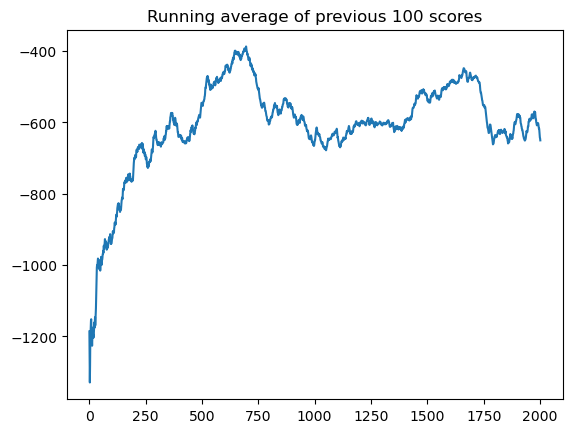

In [3]:
def plot_learning_curve(x, scores):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')

x = [i+1 for i in range(n_games)]
plot_learning_curve(x, score_history)